In [1]:
from datetime import datetime

print("last update: {}".format(datetime.now())) 

last update: 2023-05-10 22:29:53.291898


In [3]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
import joblib
import pickle
import numpy as np
import seaborn as sns

In [6]:
import pandas as pd
df = pd.read_csv("training .csv")

In [7]:
df = df.astype("int64")
df.type.value_counts()

1    199
0    199
Name: type, dtype: int64

Type is the label that represents if an application is a malware or not, as we can see this dataset is balanced.

In [8]:
df.shape

(398, 331)

*Let's get the top 10 of permissions that are used for our malware samples*

*Malicious*

In [9]:
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11]

android.permission.INTERNET                  195
android.permission.READ_PHONE_STATE          190
android.permission.ACCESS_NETWORK_STATE      167
android.permission.WRITE_EXTERNAL_STORAGE    136
android.permission.ACCESS_WIFI_STATE         135
android.permission.READ_SMS                  124
android.permission.WRITE_SMS                 104
android.permission.RECEIVE_BOOT_COMPLETED    102
android.permission.ACCESS_COARSE_LOCATION     80
android.permission.CHANGE_WIFI_STATE          75
dtype: int64

*Benign*

In [10]:
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10]

android.permission.INTERNET                  104
android.permission.WRITE_EXTERNAL_STORAGE     76
android.permission.ACCESS_NETWORK_STATE       62
android.permission.WAKE_LOCK                  36
android.permission.RECEIVE_BOOT_COMPLETED     30
android.permission.ACCESS_WIFI_STATE          29
android.permission.READ_PHONE_STATE           24
android.permission.VIBRATE                    21
android.permission.ACCESS_FINE_LOCATION       18
android.permission.READ_EXTERNAL_STORAGE      15
dtype: int64

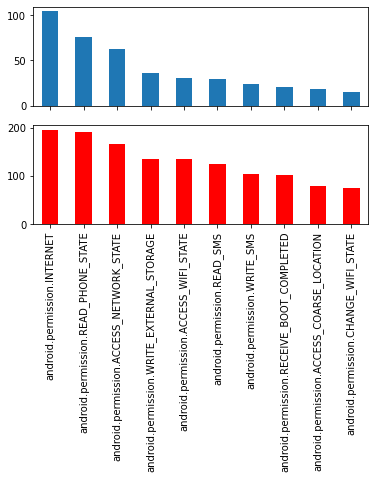

In [11]:
import matplotlib.pyplot as plt
fig, axs =  plt.subplots(nrows=2, sharex=True)

pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10].plot.bar(ax=axs[0])
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="red")

The last outputs allow us to get insights about a difference between the permissions used by the malware and the benign applications.

### Modeling

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:330], df['type'], test_size=0.20, random_state=42)

*Naive Bayes algorithm*

In [13]:
# Naive Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None))

naive_bayes
0.8375
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        41
           1       0.78      0.92      0.85        39

    accuracy                           0.84        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.84      0.84        80



*kneighbors algorithm*

In [14]:
# kneighbors algorithm

for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    # accuracy
    accuracy = accuracy_score(pred, y_test)
    print("kneighbors {}".format(i))
    print(accuracy)
    print(classification_report(pred, y_test, labels=None))
    print("")

kneighbors 3
0.8875
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.85      0.95      0.90        41

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80


kneighbors 6
0.85
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.78      0.95      0.86        38

    accuracy                           0.85        80
   macro avg       0.86      0.85      0.85        80
weighted avg       0.87      0.85      0.85        80


kneighbors 9
0.8625
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        41
           1       0.80      0.95      0.87        39

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg  

*Decision Tree*

In [15]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

DecisionTreeClassifier()
0.95
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.93      0.98      0.96        44

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

